In [1]:
import pickle
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
import graphviz

In [2]:
file = open('data_pickles/processed_features_plus', 'rb')
X_train, Y_train, X_test, Y_test, X_val, Y_val = pickle.load(file)
file.close()

## XGBoost Classifier

In [3]:
boost = xgb.XGBClassifier (objective="binary:logistic", learning_rate = 0.02, booster="gbtree")
boost.fit (X_train, Y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## Results

In [4]:
pred = boost.predict(X_test)
sci_pred = [round(value) for value in pred]

acc = accuracy_score (Y_test, sci_pred)
error = mean_squared_error (Y_test, sci_pred)
cm = confusion_matrix(Y_test, sci_pred)

print(f'Acc: {acc}')
print(f'Error: {error}')
print(f'Confusion Matrix: {cm}')


Acc: 0.8105263157894737
Error: 0.18947368421052632
Confusion Matrix: [[74 21]
 [15 80]]


In [4]:
pred = boost.predict(X_val)
sci_pred = [round(value) for value in pred]

acc = accuracy_score (Y_val, sci_pred)
error = mean_squared_error (Y_val, sci_pred)
cm = confusion_matrix(Y_val, sci_pred)

print(f'Acc: {acc}')
print(f'Error: {error}')
print(f'Confusion Matrix: {cm}')

Acc: 0.8064516129032258
Error: 0.1935483870967742
Confusion Matrix: [[75 18]
 [18 75]]


## Classifier analysis

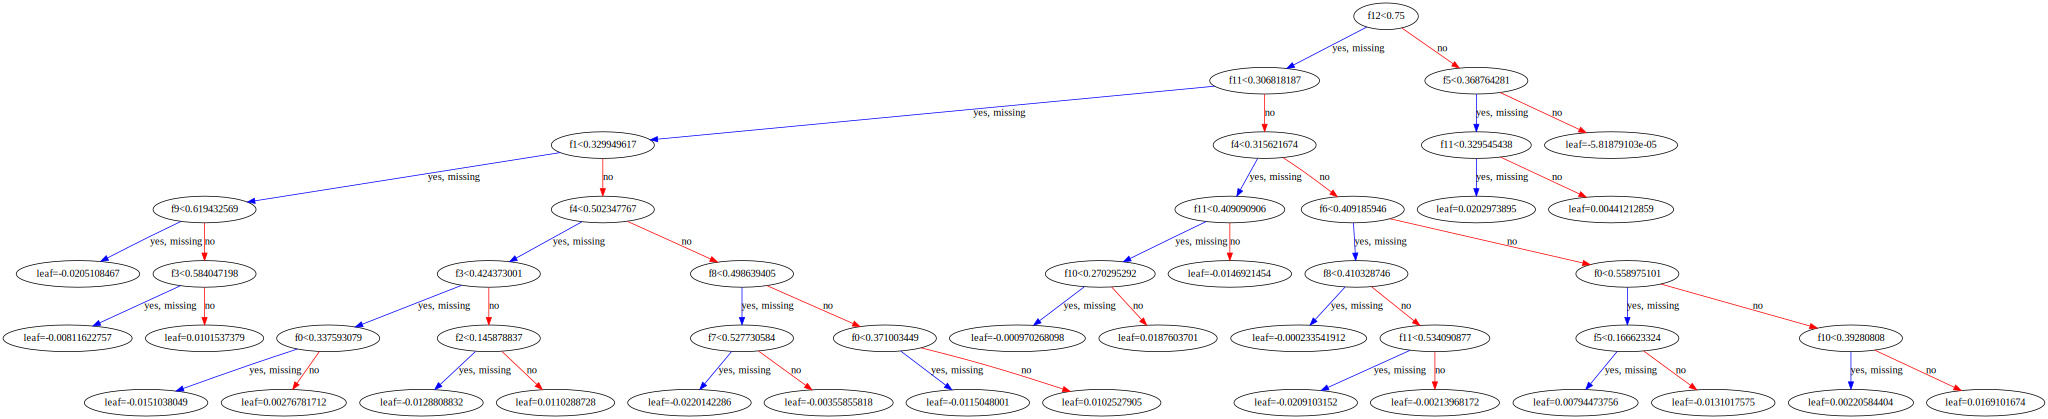

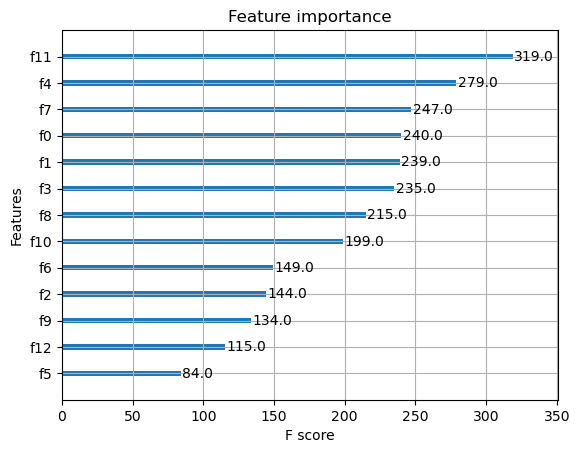

In [6]:
xgb.plot_importance(boost)
xgb.to_graphviz(boost, num_trees=boost.best_iteration)